# Exploring und Plotting 2

**Inhalt:** Selbständige Übung in Gruppen

**Nötige Skills:** Time Series

**Lernziele:**
- Selbständig Daten explorieren und Storyideen testen

# Das Beispiel

Börsenkurse aller Bluechips-Firmen an der Schweizer Börse.

Korpus: https://www.six-group.com/exchanges/shares/explorer/swiss_blue_chips/closings_de.html

Die Daten stammen von dieser Quelle: https://finance.yahoo.com/ und wurden zu einem File kompiliert.

Kompilierungsfile: `dataprojects/Boersenkurse/Börsenkurse kompilieren.ipnyb`

Kompilierte Daten: `dataprojects/Boersenkurse/smi_members.csv`

## Vorbereitung

Entscheiden Sie selbst, welche Libraries Sie brauchen!

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('dataprojects/Boersenkurse/smi_members.csv', index_col=0)

In [3]:
df.head()

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
2014-10-13,19.65,60.400002,NaN,NaN,15.54,23.689699,289.799988,1461.0,39.500000,117.300003,...,51.849998,143.899994,436.100006,211.899994,73.650002,531.5,32.000000,15.30,74.449997,279.000000
2014-10-14,19.76,60.700001,NaN,NaN,15.58,23.689699,294.399994,1478.0,39.770000,118.400002,...,52.716702,138.399994,435.299988,211.100006,73.050003,530.0,32.500000,15.33,75.000000,277.600006
2014-10-15,19.16,58.849998,NaN,NaN,15.16,22.817499,288.000000,1458.0,37.459999,115.900002,...,51.799999,134.600006,429.500000,205.699997,72.050003,515.5,32.200001,14.73,73.900002,270.399994
2014-10-16,19.26,59.500000,NaN,NaN,15.06,22.292299,288.000000,1466.0,37.509998,117.099998,...,51.783298,133.699997,431.500000,200.500000,71.050003,507.5,31.650000,14.50,72.849998,265.899994
2014-10-17,19.40,60.950001,NaN,NaN,15.38,22.751900,297.200012,1494.0,39.119999,117.500000,...,53.333302,138.399994,438.500000,208.500000,71.699997,515.5,32.500000,15.05,75.849998,271.899994


## Datenfile laden

Wie ist die Datei strukturiert? Was müssen wir beim Laden beachten?

Tipp: `index_col=0` verwenden.

In [4]:
index_col=0

In [83]:
df.index

DatetimeIndex(['2014-10-13', '2014-10-14', '2014-10-15', '2014-10-16',
               '2014-10-17', '2014-10-20', '2014-10-21', '2014-10-22',
               '2014-10-23', '2014-10-24',
               ...
               '2019-09-30', '2019-10-01', '2019-10-02', '2019-10-03',
               '2019-10-04', '2019-10-07', '2019-10-08', '2019-10-09',
               '2019-10-10', '2019-10-11'],
              dtype='datetime64[ns]', length=1255, freq=None)

In [5]:
df.index = pd.to_datetime(df.index)

## Daten checken

**Länge, Spalten, Integrität**

In [14]:
df_new = df['2019-04-06':][['ALCON', 'AMS', 'LOGITECH']]

In [15]:
df_new


,ALCON,AMS,LOGITECH
2019-04-08,NaN,31.639999,40.430000
2019-04-09,NaN,32.279999,40.360001
2019-04-10,NaN,31.660000,40.959999
2019-04-11,NaN,31.700001,40.869999
2019-04-12,NaN,32.700001,41.240002
...,...,...,...
2019-10-07,56.840000,44.369999,40.779999
2019-10-08,56.020000,42.029999,40.070000
2019-10-09,55.790001,42.549999,39.990002
2019-10-10,56.060001,42.970001,40.430000


In [16]:
df_new.dtypes
    

ALCON       float64
AMS         float64
LOGITECH    float64
dtype: object

In [9]:
df.sort_index(inplace=True)

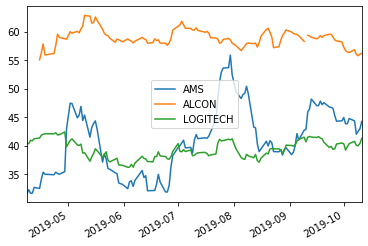

In [10]:
df_new.plot()

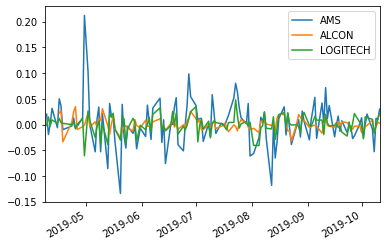

In [11]:
df_new.pct_change().plot()

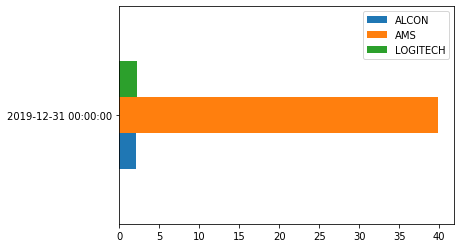

In [37]:
(df_new.resample('A').last()/df_new.resample('A').first()*100-100).plot(kind='barh')

In [38]:
(df_new.resample('A').last()/df_new.resample('A').first()*100-100)

,ALCON,AMS,LOGITECH
2019-12-31,2.033404,39.886218,2.151865


In [41]:
(df.last()/df.first()*100-100)

TypeError: last() missing 1 required positional argument: 'offset'

In [61]:
(df.max()/df.min()*100-100)

ABB LTD                69.139634
ADECCO                 91.919183
ALCON                  14.124907
AMS                    76.675107
CLARIANT              112.744381
CS GROUP              181.335765
GEBERIT                67.847220
GIVAUDAN               94.787380
JULIUS BAER            90.887571
KUEHNE+NAGEL INT       56.341669
LAFARGEHOLCIM         113.908100
LOGITECH               17.117606
LONZA                 323.846710
NESTLE                 74.691345
NOVARTIS               53.088269
PARTNERS GROUP        258.751104
RICHEMONT              85.084107
ROCHE                  41.839196
SCHINDLER             103.153529
SGS                    65.375154
SIKA                  270.147321
SONOVA                110.233387
SWATCH GROUP          100.765818
SWISS LIFE HOLDING    147.331668
SWISS RE               46.727650
SWISSCOM               36.840875
TEMENOS               586.704117
UBS GROUP             126.358149
VIFOR                 166.759784
ZURICH INSURANCE       98.367341
dtype: flo

In [62]:
df.max()

ABB LTD                 27.129999
ADECCO                  83.599998
ALCON                   62.860001
AMS                     55.900002
CLARIANT                29.379999
CS GROUP                26.915899
GEBERIT                483.399994
GIVAUDAN              2840.000000
JULIUS BAER             64.519997
KUEHNE+NAGEL INT       181.199997
LAFARGEHOLCIM           72.857101
LOGITECH                42.419998
LONZA                  361.000000
NESTLE                 113.199997
NOVARTIS                92.699997
PARTNERS GROUP         815.799988
RICHEMONT               99.019997
ROCHE                  294.600006
SCHINDLER              244.800003
SGS                   2689.000000
SIKA                   167.800003
SONOVA                 234.199997
SWATCH GROUP           498.100006
SWISS LIFE HOLDING     495.899994
SWISS RE               104.250000
SWISSCOM               586.500000
TEMENOS                183.350006
UBS GROUP               22.500000
VIFOR                  191.000000
ZURICH INSURAN

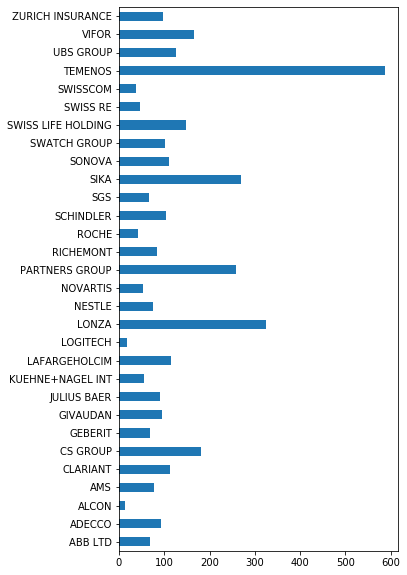

In [59]:
(df.max()/df.min()*100-100).plot(kind='barh', figsize=(5,10))

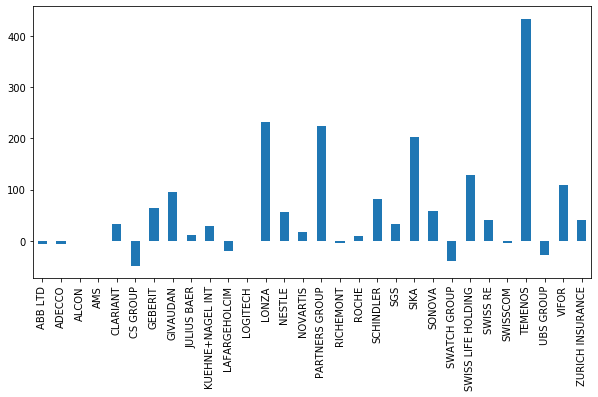

In [82]:
(df.iloc[-1]/df.iloc[0]*100-100).plot(kind='bar', figsize=(10,5))

## Explorieren

Ihr Ziel ist, aus den Börsendaten eine einfache Story zu generieren.

Überlegen Sie sich dazu:
- Was sind mögliche interessante Fragen?
- Welche Auswertungen sind nötig, um die Fragen zu beanworten?
- Wie stellen Sie die Resultate mittels Grafiken dar?

Arbeiten Sie in Gruppen, um ein Ergebnis zu erarbeiten!

In [92]:

df.idxmin()

ABB LTD              2016-01-20
ADECCO               2019-01-03
ALCON                2019-04-15
AMS                  2019-04-08
CLARIANT             2015-01-22
CS GROUP             2016-07-06
GEBERIT              2014-10-15
GIVAUDAN             2014-10-15
JULIUS BAER          2018-12-27
KUEHNE+NAGEL INT     2014-10-15
LAFARGEHOLCIM        2016-02-11
LOGITECH             2019-06-03
LONZA                2015-01-16
NESTLE               2015-01-16
NOVARTIS             2016-04-01
PARTNERS GROUP       2015-01-22
RICHEMONT            2016-06-27
ROCHE                2018-06-08
SCHINDLER            2014-10-15
SGS                  2015-08-24
SIKA                 2015-01-21
SONOVA               2016-02-11
SWATCH GROUP         2016-08-02
SWISS LIFE HOLDING   2014-10-16
SWISS RE             2014-10-16
SWISSCOM             2018-10-08
TEMENOS              2015-01-22
UBS GROUP            2019-08-14
VIFOR                2015-01-23
ZURICH INSURANCE     2016-04-07
dtype: datetime64[ns]

In [93]:
df_tem = df['TEMENOS']

In [95]:
df_tem.idxmin()
df_tem.idxmax()

Timestamp('2019-05-28 00:00:00')

## Die Story
Wählen Sie eine ihrer Fragen aus, die Sie bearbeitet haben.
- Drei bis vier Sätze, welche die Story zusammenfassen
- eine oder mehrere Grafiken, die das Ergebnis illustrieren